# HEART DISEASE BIAS INVESTIGATION PROJECT

In [4]:
#Importation of Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report



#This importation is to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
#Importation and Loading of Datasets
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,No
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,No
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No


# STATISTICAL ANALYSIS

In [6]:
#Shape of the Datsaset Showing the Number of Rows and Columns
df.shape

(1025, 14)

In [7]:
#details of the last 5 rows of the dataset  
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,Yes
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,No
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,No
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,Yes
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,No


In [8]:
#Checking for Duplicate values
df.duplicated().sum()

723

In [9]:
df.target.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
#Summary of the Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [11]:
#Description of the Dataset showing the Mean, Median, Mode, Standard Deviation, Minimum and Maximum Values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# DATA PREPROCESSING

In [12]:
#Checking for Missing Values in the Dataset using Columns
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#Checking for Missing Values in all the Dataset
df.isnull().sum().sum()

#We have no missing values in the Dataset

0

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
#Checking the number of categorical and numerical columns in the dataset
#We have only 2 categorical column in the dataset which Gender & Target column
cat = df.select_dtypes(include='object').columns
numer = df.select_dtypes(include=np.number).columns
print ("There is" ,len(cat), "categorical column in the dataset which is the target column")
print ("There are",len(numer), "Numerical column in the dataset which are the independent variables")

There is 1 categorical column in the dataset which is the target column
There are 13 Numerical column in the dataset which are the independent variables


# LABEL ENCODING 

In [16]:
#Label Encoding the Sex and Target Column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Transformation of Categorical Data into Numberical Data

df['target'] = labelencoder.fit_transform(df['target'])
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# EXPLORATORY DATA ANALYSIS

In [17]:
#Checking for the unique values in the numerical column
print("The unique values in the numerical columns are: ")
for i in numer:
    print(i,"has: ",df.loc[:,i].nunique(),"unique values")
    
#This shows that the values in all the numerical columns are unique

The unique values in the numerical columns are: 
age has:  41 unique values
sex has:  2 unique values
cp has:  4 unique values
trestbps has:  49 unique values
chol has:  152 unique values
fbs has:  2 unique values
restecg has:  3 unique values
thalach has:  91 unique values
exang has:  2 unique values
oldpeak has:  40 unique values
slope has:  3 unique values
ca has:  5 unique values
thal has:  4 unique values


In [18]:
target_count = df['target'].value_counts()
print(target_count)
print("Percentage of patience with Heart Disease is: "+ str(round(target_count[1]*100/1025, 2)) + "%")
print("Percentage of patience without Heart Disease is: : "+ str(round(target_count[0]*100/1025,2)) + "%")

target
1    526
0    499
Name: count, dtype: int64
Percentage of patience with Heart Disease is: 51.32%
Percentage of patience without Heart Disease is: : 48.68%


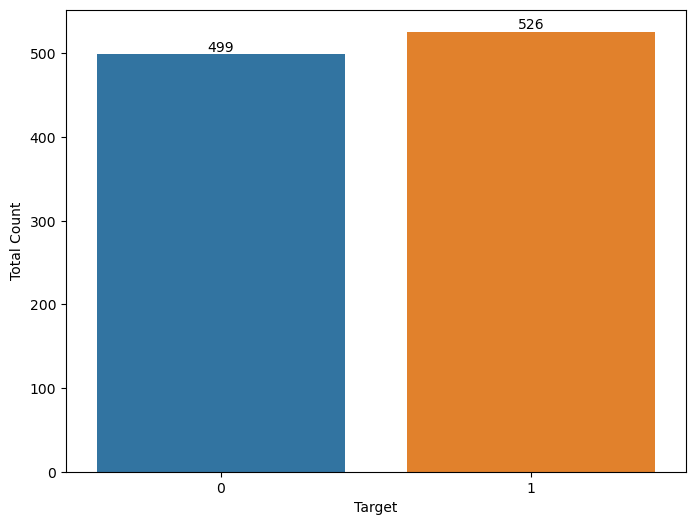

In [19]:
#Showing Data Distribution of the only categorical columns Diagnosis
plt.figure(figsize=(8, 6))
diag = sns.countplot(x='target', data=df, palette=['#1f77b4', '#ff7f0e'])
diag.bar_label(diag.containers[0])
diag.bar_label(diag.containers[1])
plt.xlabel("Target")
plt.ylabel("Total Count")
plt.show()

In [20]:
print ("Unique Values in the sex Categories", df["sex"].unique())
print ("Male and Female Count" , df.sex.value_counts())

Unique Values in the sex Categories [1 0]
Male and Female Count sex
1    713
0    312
Name: count, dtype: int64


According to the Countplot, the sampling between male and female is unbalanced across the features.
We will not apply any sampling technique at this stage. In other to investigate bias we use the dataset as it as find the accuracy score and all and the use undesampling method and find the accuracy score and all again to determine bias.


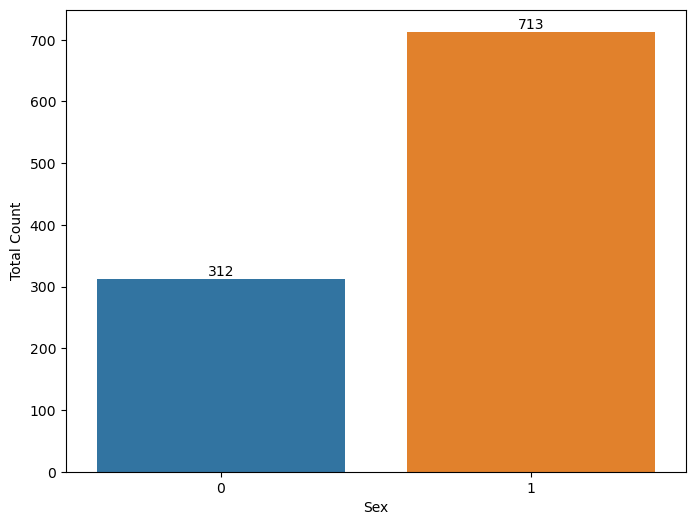

In [21]:
#Showing Data Distribution of the only categorical columns Diagnosis
plt.figure(figsize=(8, 6))
diag = sns.countplot(x='sex', data=df, palette=['#1f77b4', '#ff7f0e'])
diag.bar_label(diag.containers[0])
diag.bar_label(diag.containers[1])
plt.xlabel("Sex")
plt.ylabel("Total Count")
plt.show()

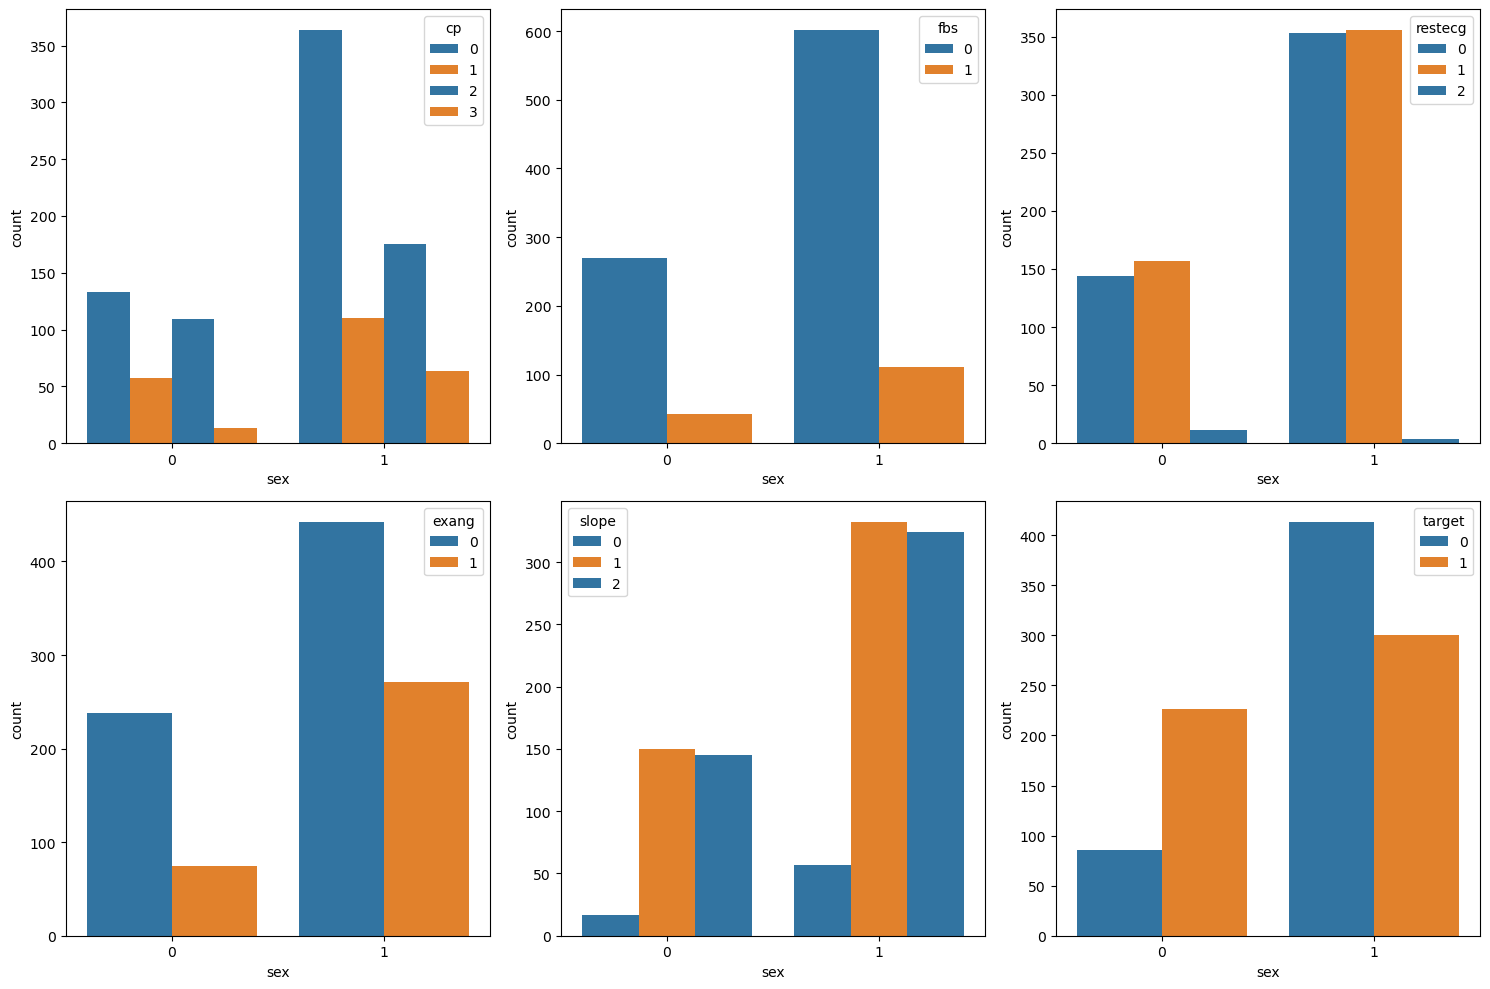

In [22]:
# Visualize the features/columns by showing the counts 
# of observations/rows in each categorical bin. We will use the seaborn package.
data = df  
# Define plot parameters in a list to avoid repetition
plot_params = [
    ("cp", (0, 0)),
    ("fbs", (0, 1)),
    ("restecg", (0, 2)),
    ("exang", (1, 0)),
    ("slope", (1, 1)),
    ("target", (1, 2))
]
# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Loop through plot_params to create the plots
for hue_col, position in plot_params:
    sns.countplot(x="sex", hue=hue_col, data=df, ax=ax[position], palette=['#1f77b4', '#ff7f0e'])

plt.tight_layout()  # Adjust spacing
plt.show()

In [23]:
# Select categorical columns based on dtype
cat_cols = df.select_dtypes(include=['object']).columns

# Apply categorical encoding
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int32
dtype: object

In [24]:
#Create the attribute and target data:
X=df.drop(columns=['target'],axis=1)
Y=df["target"]
#Splitting the Dataset into Training and Testing Dataset
print (X.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


In [25]:
print (Y.head(10))

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: target, dtype: int32


# DATA SPLITTING

In [26]:
from sklearn.model_selection import train_test_split
#Split the data into training and test data using train_test_split() function. :
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.2,
                                               stratify=Y,
                                               random_state=7)
print("Shape of Datasets:", X.shape)
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Shape of Output Train set:", Y_train.shape)
print("Shape of Output Test set:", Y_test.shape)
print("Count of Training set according to Yes & No:", Y_train.value_counts())
print("Count of Test set according to Yes & NO:", Y_test.value_counts())


#print(X.shape,X_train.shape,X_test.shape)

Shape of Datasets: (1025, 13)
Shape of training set: (820, 13)
Shape of test set: (205, 13)
Shape of Output Train set: (820,)
Shape of Output Test set: (205,)
Count of Training set according to Yes & No: target
1    421
0    399
Name: count, dtype: int64
Count of Test set according to Yes & NO: target
1    105
0    100
Name: count, dtype: int64


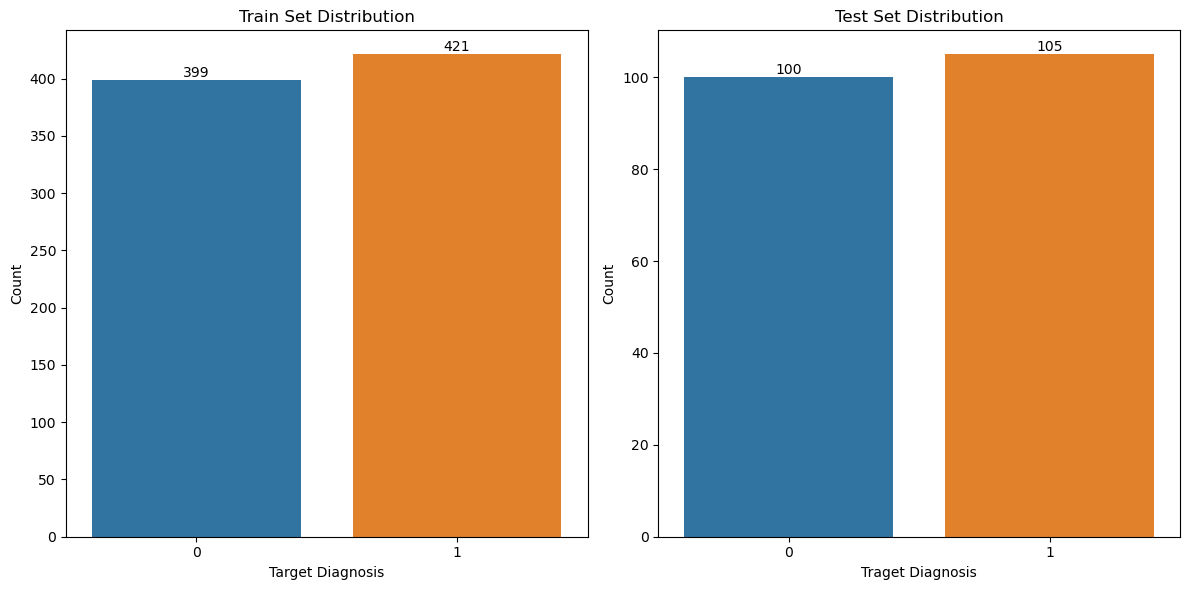

In [27]:
# Plotting the distribution of the train and test sets

plt.figure(figsize=(12, 6))

# Train set distribution
plt.subplot(1, 2, 1)
diagtrain = sns.countplot(x=Y_train, palette=['#1f77b4', '#ff7f0e'])
diagtrain.bar_label(diagtrain.containers[0])
diagtrain.bar_label(diagtrain.containers[1])
plt.title('Train Set Distribution')
plt.xlabel('Target Diagnosis')
plt.ylabel('Count')

# Test set distribution
plt.subplot(1, 2, 2)
diagtest = sns.countplot(x=Y_test, palette=['#1f77b4', '#ff7f0e'])
diagtest.bar_label(diagtest.containers[0])
diagtest.bar_label(diagtest.containers[1])
plt.title('Test Set Distribution')
plt.xlabel('Traget Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns, index=X.index)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


# Develop and Evaluate the model

In [29]:
from sklearn.svm import SVC

# Create a Gender-Aware SVM model with a linear kernel:
SVM_model = SVC(kernel="linear").fit(X_train,Y_train)
                #probability=True)

# Evaluate using the testing data

In [30]:
Y_predict=SVM_model.predict(X_test)

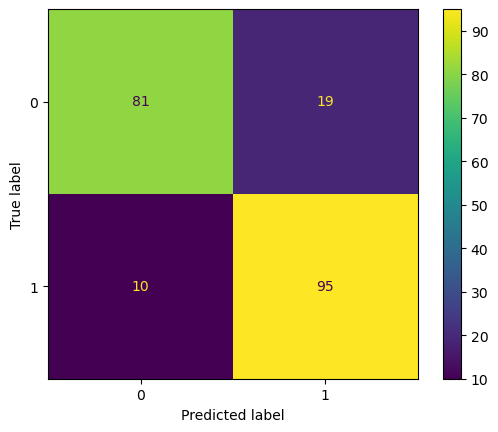

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Display the confusion matrix for your model
cm = confusion_matrix(Y_test, Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [32]:
print ("True Positive: ", cm[1][1])
print ("True Negative: ", cm[0][0])
print ("False Positive: ", cm[0][1])
print ("False Negative: ", cm[1][0])

True Positive:  95
True Negative:  81
False Positive:  19
False Negative:  10


# EVALUATION METRIX

In [33]:
from sklearn.metrics import *


print(f"Accuracy of the Test Slpit against the Output: {accuracy_score(Y_test, Y_predict) *100 :.2f}%") 
print(f"Precision of the Test Slpit against the Output: { precision_score(Y_test, Y_predict)*100 :.2f}%")
print(f"Recall of the Test Slpit against the Output: { recall_score(Y_test, Y_predict)*100 :.2f}%")
print(f"F1 of the Test Slpit against the Output: { f1_score(Y_test, Y_predict)*100 :.2f}%")

Accuracy of the Test Slpit against the Output: 85.85%
Precision of the Test Slpit against the Output: 83.33%
Recall of the Test Slpit against the Output: 90.48%
F1 of the Test Slpit against the Output: 86.76%


# Now we Get the indices for “Male” and “Female” from the test data


In [34]:
PROTECTED = "sex"
MEN = 1.0 #male
WOMEN = 0.0 #women
gender_dist = X_test[PROTECTED].value_counts()
print(gender_dist)

sex
1    148
0     57
Name: count, dtype: int64


In [35]:
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]

In [36]:
Y_predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1])

In [49]:
results_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_predict,
    'Sex': X_test[PROTECTED]
})

# Take only the first 15 rows
results_sample = results_df.head(15)

# Option 1: Just print it
print(results_sample)

      Actual  Predicted  Sex
252        0          0    1
181        1          1    1
717        0          1    1
81         0          0    1
435        1          1    0
798        0          1    1
537        1          1    1
909        0          0    1
88         0          0    0
975        0          0    1
285        1          1    0
5          1          1    0
13         0          0    1
1012       0          0    1
575        1          1    1


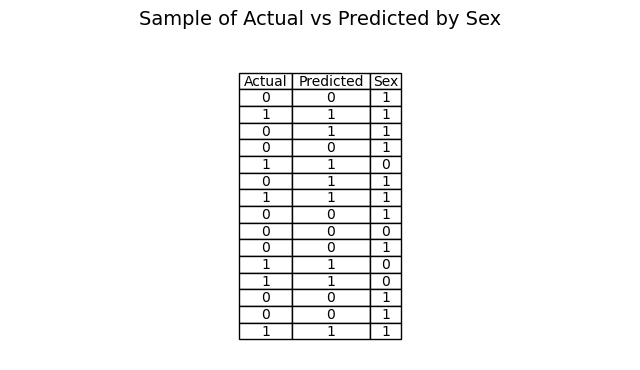

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_sample.values,
                 colLabels=results_sample.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(results_sample.columns))))

plt.title('Sample of Actual vs Predicted by Sex', fontsize=14, pad=20)
plt.show()

In [37]:
print("No of Men =", men_indices.size)
print("No of Women =", women_indices.size)

No of Men = 148
No of Women = 57


In [38]:
# Extract the actual and predicted outcomes for the two groups
# We will use the indices to split Y_test into two groups (one for Male and one for Female)
Y_test_m = [Y_test.values[i] for i in men_indices]
Y_test_f = [Y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]


In [39]:
# Extract the actual and predicted outcomes for the two groups
# Extract the predicted outcomes for the two groups
# Use the indices to split the predicted values (Y_predict) into two groups
Y_predict_m = [Y_predict[i] for i in men_indices]
Y_predict_f = [Y_predict[i] for i in women_indices]
print(Y_predict_m)
print(Y_predict_f)

[0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


# CONFUSION MATRIX FOR MALE

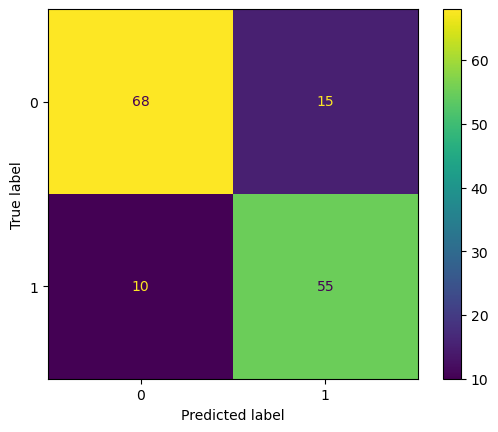

In [40]:
confustionm_male = confusion_matrix(Y_test_m, Y_predict_m)
disp = ConfusionMatrixDisplay(confusion_matrix=confustionm_male)
disp.plot()

In [41]:
print ("True Negative: ", confustionm_male[0][0])
print ("False Positive: ", confustionm_male[0][1])
print ("False Negative: ", confustionm_male[1][0])
print ("True Positive: ", confustionm_male[1][1])

True Negative:  68
False Positive:  15
False Negative:  10
True Positive:  55


In [42]:
print(f"Accuracy of the Male: {accuracy_score(Y_test_m, Y_predict_m) *100 :.2f}%") 
print(f"Precision of the Male: { precision_score(Y_test_m, Y_predict_m)*100 :.2f}%")
print(f"Recall of the Male:{ recall_score(Y_test_m, Y_predict_m)*100 :.2f}%")
print(f"F1 of the Male: { f1_score(Y_test_m, Y_predict_m)*100 :.2f}%")

Accuracy of the Male: 83.11%
Precision of the Male: 78.57%
Recall of the Male:84.62%
F1 of the Male: 81.48%


# CONFUSION MATRIX FOR FEMALE

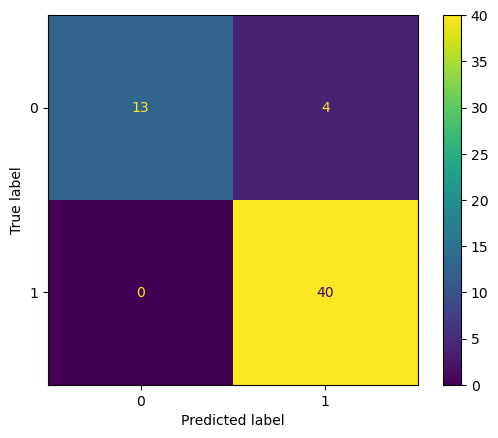

In [43]:
confustionm_FEmale = confusion_matrix(Y_test_f, Y_predict_f)
disp = ConfusionMatrixDisplay(confusion_matrix=confustionm_FEmale)
disp.plot()

In [44]:
print ("True Negative: ", confustionm_FEmale[0][0])
print ("False Positive: ", confustionm_FEmale[0][1])
print ("False Negative: ", confustionm_FEmale[1][0])
print ("True Positive: ", confustionm_FEmale[1][1])

True Negative:  13
False Positive:  4
False Negative:  0
True Positive:  40


In [45]:
print(f"Accuracy of the Female: {accuracy_score(Y_test_f, Y_predict_f) *100 :.2f}%") 
print(f"Precision of the Female: { precision_score(Y_test_f, Y_predict_f)*100 :.2f}%")
print(f"Recall of the Female:{ recall_score(Y_test_f, Y_predict_f)*100 :.2f}%")
print(f"F1 of the Female: { f1_score(Y_test_f, Y_predict_f)*100 :.2f}%")

Accuracy of the Female: 92.98%
Precision of the Female: 90.91%
Recall of the Female:100.00%
F1 of the Female: 95.24%


In [57]:
male_acc = accuracy_score(Y_test_m, Y_predict_m)
female_acc = accuracy_score(Y_test_f, Y_predict_f)
print(f"Difference in accuracy: {abs(male_acc - female_acc):.4f}")

Difference in accuracy: 0.0987


#### Note: Discuss equal accuracy difference and conclude

## Demographic Parity Test

In [46]:
dp_male = np.mean(np.array(Y_predict_m) == 1)
dp_female = np.mean(np.array(Y_predict_f) == 1)

print(f"Demographic Parity - Male: {dp_male:.4f}")
print(f"Demographic Parity - Female: {dp_female:.4f}")
print(f"Difference in Demographic Parity: {abs(dp_male - dp_female):.4f}")

Demographic Parity - Male: 0.4730
Demographic Parity - Female: 0.7719
Difference in Demographic Parity: 0.2990


# Equal Opportunity

In [54]:
print ("recall Score for Male " , recall_score(Y_test_m, Y_predict_m))
print ("recall Score for Female" , recall_score(Y_test_f, Y_predict_f))

recall Score for Male  0.8461538461538461
recall Score for Female 1.0


In [55]:
recall_male = recall_score(Y_test_m, Y_predict_m)
recall_female = recall_score(Y_test_f, Y_predict_f)

In [56]:
print(f"Recall Male (Equal Opportunity): {recall_male:.4f}")
print(f"Recall Female (Equal Opportunity): {recall_female:.4f}")
print(f"Difference in Equal Opportunity: {abs(recall_male - recall_female):.4f}")

Recall Male (Equal Opportunity): 0.8462
Recall Female (Equal Opportunity): 1.0000
Difference in Equal Opportunity: 0.1538
